[//]: <> (!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!)
[//]: <> (Erase all <span style="color:red">_..._</span> sections and replace them with required information.)
[//]: <> (!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!)

# Machine Learning & Energy 23/24 mini-project

#### Team Group 10

#### Participants

| Name Surname | Kaggle username | Contribution |
|--------------|-----------------|--------------|
| Benedikt Hanisch | ??? | Teamwork Only |
| Paul Schlott | Paul Stt | Teamwork Only |

#### Abstract

<span style="color:red">_Briefly explain our approach here._</span>

#### Important information

This is the main solution/report file of our team. When we submit a ZIP archive with our solution on Moodle, tutors of Machine Learning & Energy course will run this file to validate it. After full execution, this notebook should produce a correctly formatted CSV file with our predictions. Moodle submissions without this file will be dismissed.

Please keep this file structured and describe as many stages as possible, since this will likely decrease the number of questions during our defence. For example, we can talk about...

1. ... visual exploration of data (build some plots, say what we observed),
2. ... data exploration (maybe we computed correlations between different features and noticed something?),
3. ... feature extraction (how we decided to preprocess our data and why),
4. ... model training (what model we used, how we trained it, how we chose the hyperparameters),
5. ... predictions (show how we make predictions).

Don't forget to use the `make_submission_file` function from `miniprojectmodule.py` to generate the CSV files with your predictions in the correct format.

Furthermore, if we use Python modules that are _not_ included into the default configuration of our `MLE Python environment` environment, please also include the `requirements.txt` file outlining all your dependencies into our ZIP archive. We can generate this file by running the cell below.

In [16]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In order to reduce the size of our Moodle submission, please also do _not_ include the original datasets into our ZIP archive and do _not_ change file names of these datasets! Instead, we set the relative path to the folder where these datasets are supposed to be located to the `DATA_PATH` variable in the code cell below (if the datasets should be located in the same folder with this main file, set `DATA_PATH` to `'./'`). If we want to modify the original datasets and save them for later use and if our code relies on reading these processed datasets from disk, consider saving/loading them with `pickle` module and include the PKL files into our Moodle submission.

In [17]:
DATA_PATH = './' #'./datasets/'

When tutors check your solution, they will do the following steps:

1. They will unpack your ZIP archive into a folder with a copy of `MLE Python environment` environment.
2. They will put the original datasets into the folder indicated by `DATA_PATH`.
3. If there is a `requirements.txt` file, they will install all modules from the file within the same environment.
4. After this, they will run this notebook within the same environment.

If after doing all these actions the notebook produces an error or does not produce a file with predictions, the Moodle submission will be dismissed.

Only one participant from each team should make a Moodle submission. If multiple Moodle submissions are made by one team, only the latest will be considered for verification.

You can proceed with your code and explanations after the horizontal line below.

_**Good luck!**_

---

In [18]:
# datetime 	Timestamp 	yyyy-mm-dd HH:MM:SS
# tclw 	Total column liquid water (measurement of water droplets in the clouds) 	kg⋅m⁻²
# tciw 	Total column ice water (measurement of ice in the clouds) 	kg⋅m⁻²
# sp 	Surface pressure 	Pa
# r 	Relative humidity at 1000 mbar 	%
# tcc 	Total cloud cover 	[0, 1]
# 10u 	Meridional wind component (West → East) at 10 m above the ground 	m⋅s⁻¹
# 10v 	Zonal wind component (South → North) at 10 m above the ground 	m⋅s⁻¹
# 2t 	Air temperature at 2 m above the ground 	°K
# ssrd 	Surface solar radiation downwards (visible radiation) 	J⋅m⁻²
# strd 	Surface thermal radiation downwards (infrared radiation) 	J⋅m⁻²
# tsr 	Top net solar (shortwave) radiation 	J⋅m⁻²
# tp 	Total precipitation 	m
# power 	Normalised hourly energy output of a power plant 	[0, 1]

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns # package for statistical data visualization

data = pd.read_csv("data_train_1.csv", sep=",", index_col=0, parse_dates=True)
data["month"] = data.index.month_name()
data["year"] = data.index.year
data.head(2)


tclw      tciw         sp          r       tcc       10u  \
datetime                                                                        
2012-05-01 00:00:00   0.0  0.026691  95462.250  74.200241  0.814880  0.523571   
2012-05-01 01:00:00   0.0  0.010275  95448.875  73.447479  0.972576  1.174747   

                          10v          2t        ssrd        strd         tsr  \
datetime                                                                        
2012-05-01 00:00:00 -1.758471  285.401856  11866936.0  25408576.0  14246758.0   
2012-05-01 01:00:00 -1.753343  286.291504   1804488.0   1087089.0   2044841.0   

                      tp     power month  year  
datetime                                        
2012-05-01 00:00:00  0.0  0.680962   May  2012  
2012-05-01 01:00:00  0.0  0.749167   May  2012

In [20]:
# sns.pairplot(data, corner=True)

# recommendation: run line above once and save the image

In [21]:
# the following lines have been left out since the information is not helpful / needed

# year = 2013

# sns.set()
# fig,ax = plt.subplots(figsize=(18,8))
# sns.lineplot(data=data[data.year==year], x=data[data.year==year].index, y="r",ax=ax)
# ax.set_title(f"power time series for {year}")
# fig.tight_layout()

# subset_data = data[data["year"] == year]

# features = data.columns.tolist()
# num_plots = len(features)
# fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(18, 4 * num_plots))

# for i, feature in enumerate(features):
#     sns.lineplot(data=subset_data, x=subset_data.index, y=feature, ax=axes[i])
#     axes[i].set_title(f"{feature} - {year}")
#     axes[i].set_xlabel("Time")
#     axes[i].set_ylabel(feature)

# fig.tight_layout()

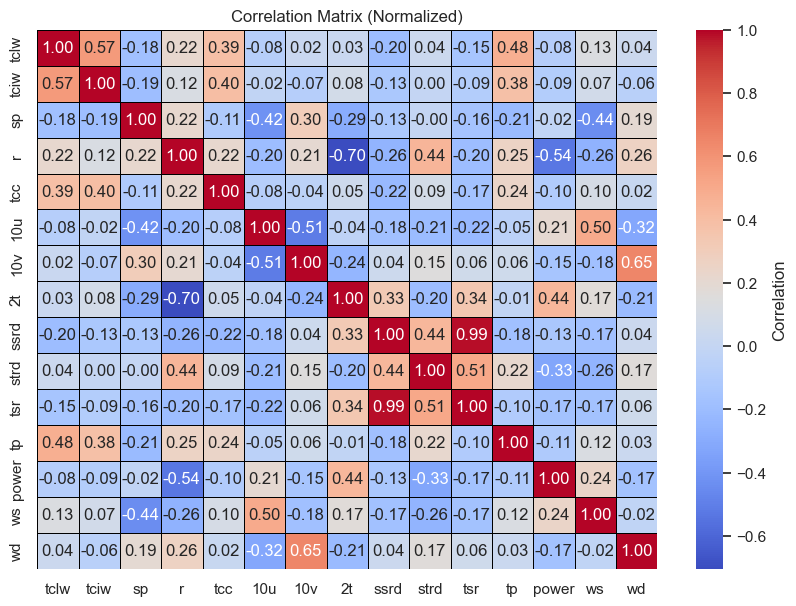

Explained Variance Ratio:
[0.2161318]
PC1: r, ssrd, tsr, 10u, ws, tcc
Explained Variance Ratio:
[0.2161318]
Top Six Features:
Index(['r', '10u', '10v', 'power', '2t', 'strd'], dtype='object')


In [52]:
# DATA ANALYSIS WITH CORRELATION MATRIX

# complete data analysis to identify correlations and relevant factors for predicting power output

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 


# Replace 10u and 10v with ws and wd
data['ws'] = np.sqrt(data['10u']**2 + data['10v']**2)
data['wd'] = np.arctan2(data['10v'], data['10u']) * (180/np.pi)

# Exclude "month" and "year" columns from the correlation calculation
features_to_exclude = ["month", "year"]
selected_features = [col for col in data.columns if col not in features_to_exclude]

# Normalize the data
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data[selected_features]), columns=selected_features)

# Calculate the correlation matrix for the normalized data
correlation_matrix_normalized = normalized_data.corr()

# Plot the correlation matrix using seaborn and highlight the row and column of the variable "power"
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,
            linecolor='black', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix (Normalized)")
plt.show()

In [82]:
# DATA PREPARATION 

# Add wind speed (ws) and wind direction (wd)
data['ws'] = np.sqrt(data['10u']**2 + data['10v']**2)
data['wd'] = np.arctan2(data['10v'], data['10u']) * (180/np.pi)

# Exclude "month", "year", and "power" columns
features_to_exclude = ["month", "year", "power"]
predictors = [col for col in data.columns if col not in features_to_exclude]

# Separate predictors and target variable
X = data[predictors]
y = data["power"]

# Standardize the predictors
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [85]:
# TREE BASED MODEL

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

top_features = feature_importances.nlargest(10).index
print("Top 10 Features:")
print(top_features)

Top 10 Features:
Index(['strd', 'r', 'tsr', '2t', 'sp', 'tcc', 'tciw', '10u', 'ssrd', 'tp'], dtype='object')


In [78]:
# LASSO REGRESSION

from sklearn.linear_model import LassoCV

# Assuming X and y are defined
model = LassoCV()
model.fit(X, y)

nonzero_coefs = pd.Series(model.coef_, index=X.columns)
top_features = nonzero_coefs[nonzero_coefs.abs().nlargest(10).index].index
print("Top Ten Features:")
print(top_features)



Top Ten Features:
Index(['strd', 'tclw', 'tciw', 'sp', 'r', 'tcc', '2t', 'ssrd', 'tsr', 'tp'], dtype='object')


In [80]:
# RECURSIVE FEATURE ELIMINATION

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X and y are defined
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

top_features = X.columns[rfe.support_]
print("Top Ten Features:")
print(top_features)

Top Ten Features:
Index(['tclw', 'tciw', 'sp', 'r', 'tcc', '2t', 'tsr', 'tp', 'ws', 'wd'], dtype='object')


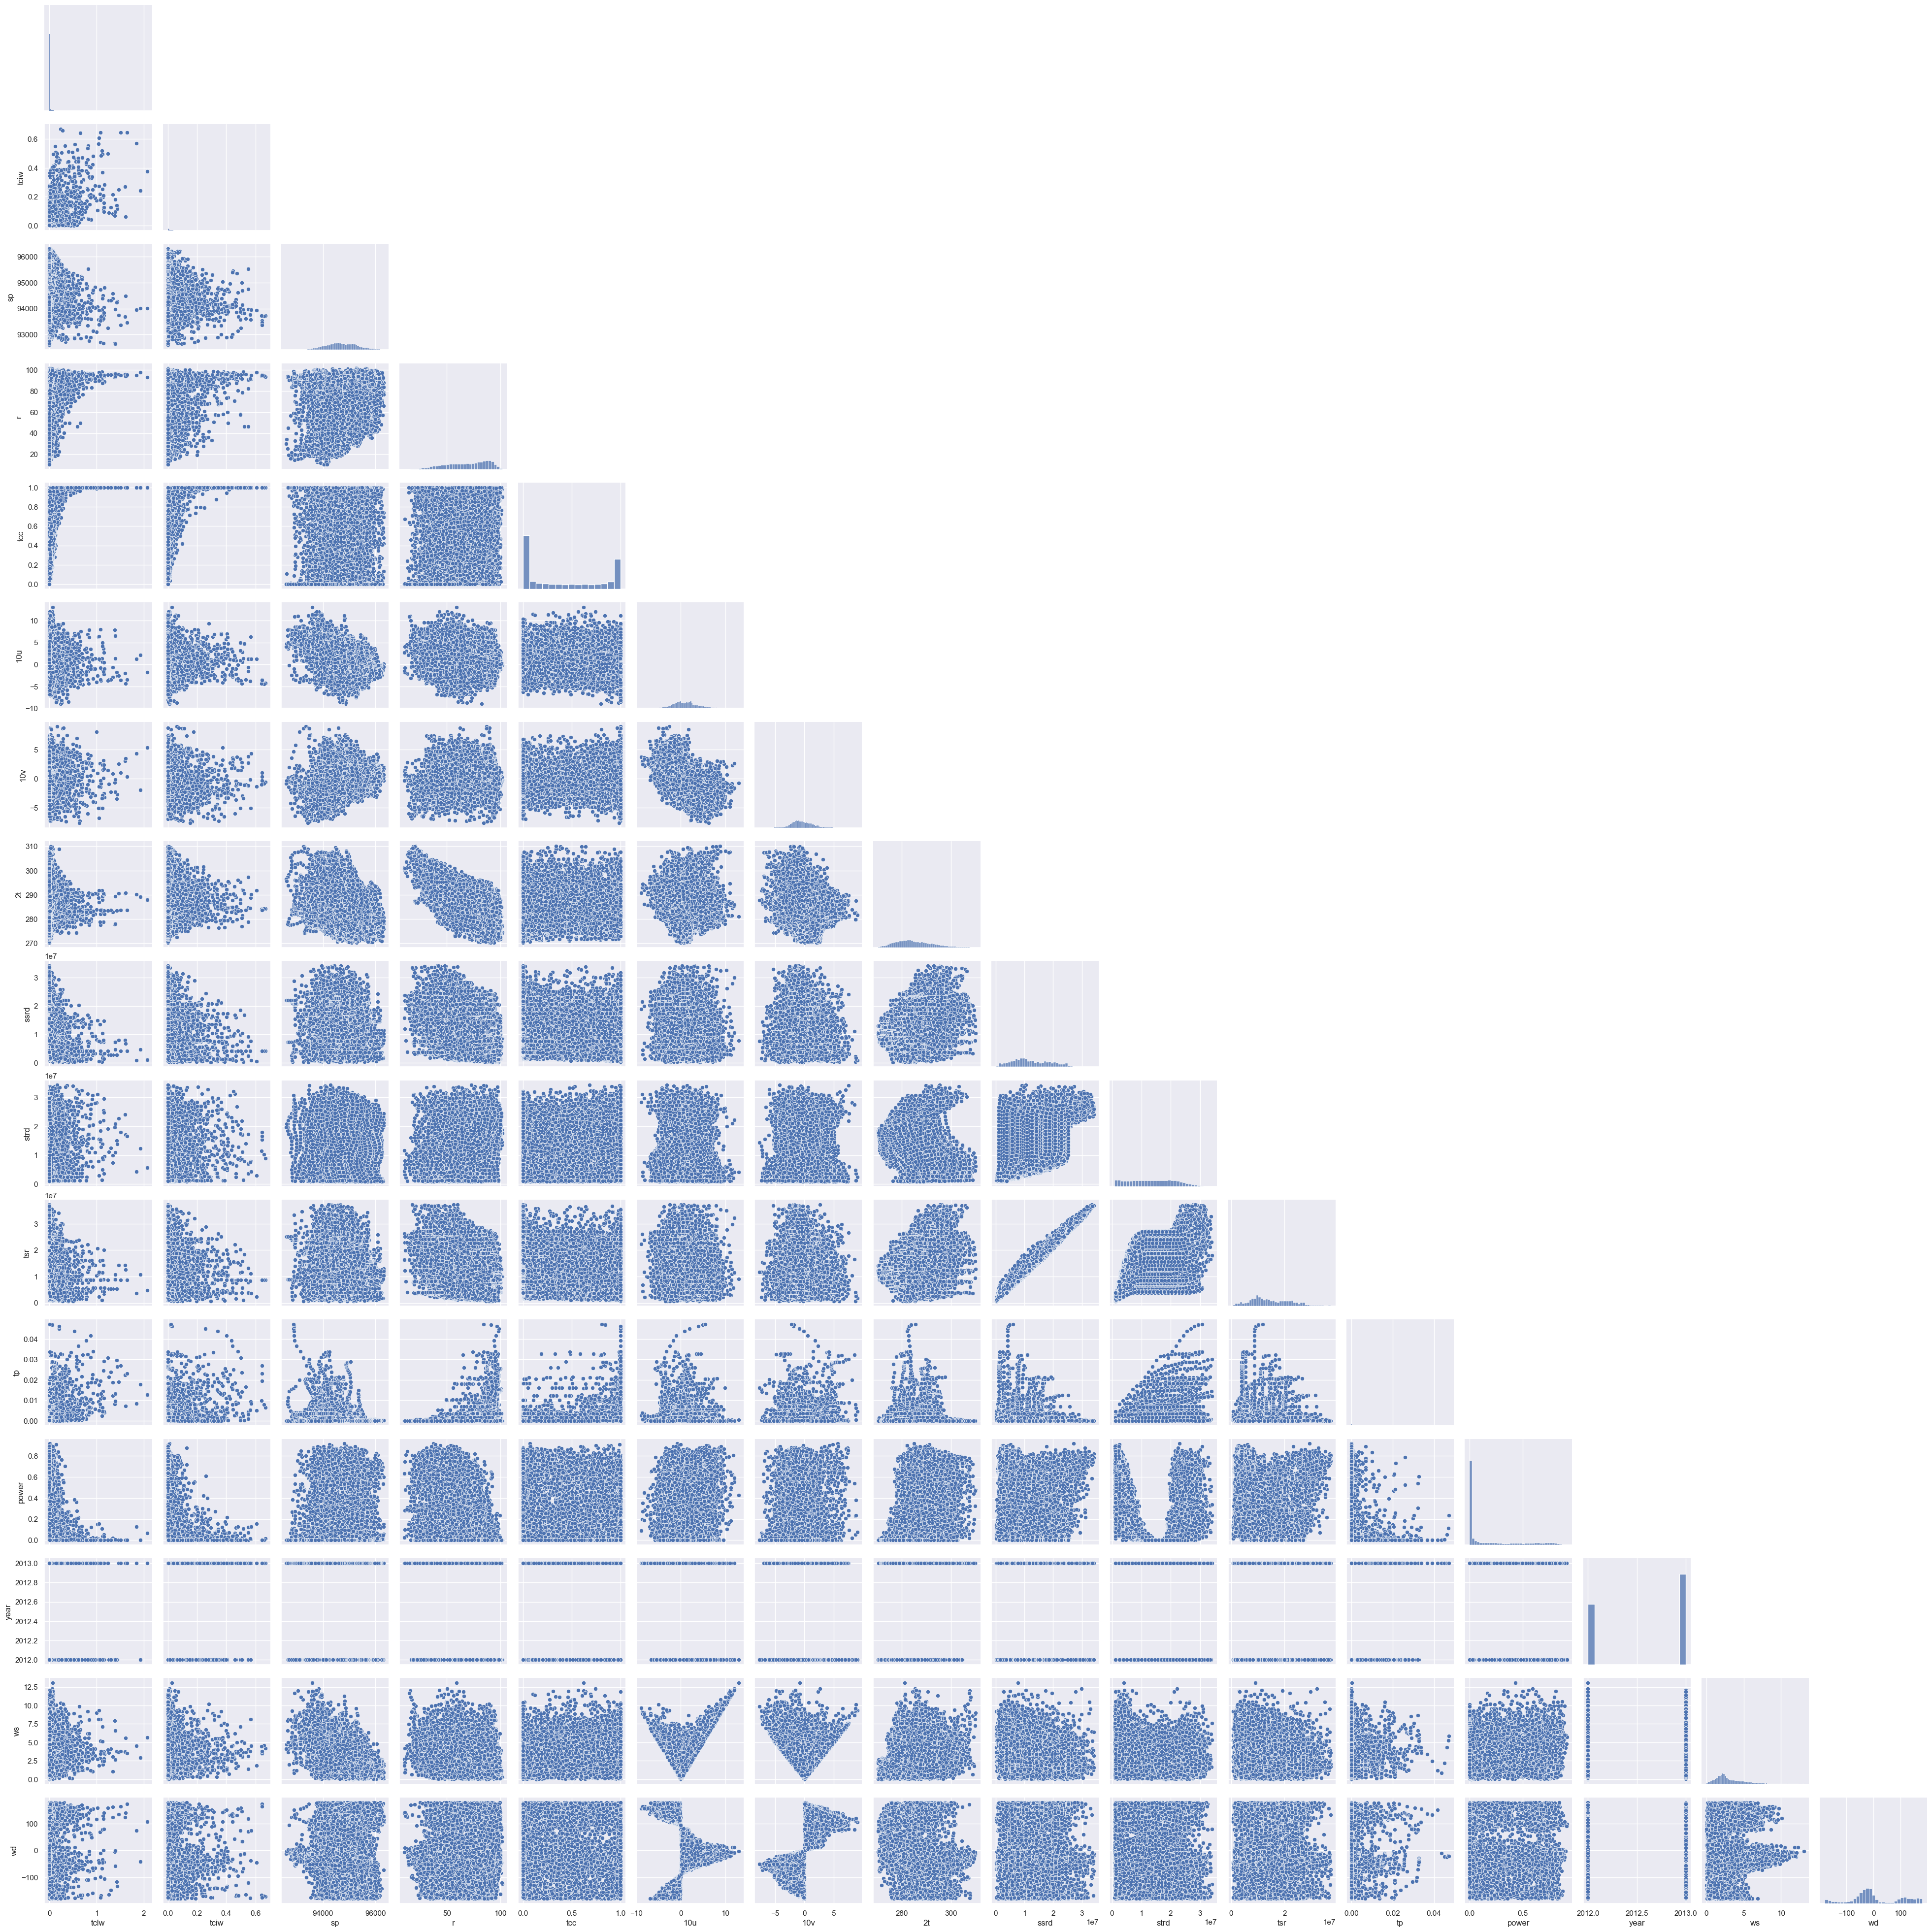

In [81]:
sns.pairplot(data, corner=True)

In [22]:
# STEP 1 - DATA PREPROCESSING

# data selection and enhancement



# normalize data



# one-hot encoding for year, month, day and hours



# label test data